<a href="https://colab.research.google.com/github/jp-the-creator/ml-project-nueral-nw/blob/main/Copy_of_NLP_Project_Low_Code_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_____' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_____' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

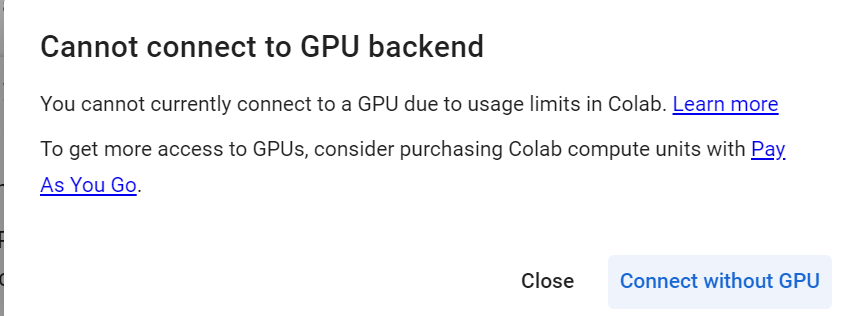

## **Installing and Importing the necessary libraries**

In [ ]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.9/275.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
# To manipulate and analyze data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

# To parse JSON data
import json


In [ ]:
# To build, tune, and evaluate ML models
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier from sklearn.tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [ ]:

# # To build, tune, and evaluate ML models
# from sklearn.ensemble import DecisionTreeClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import RandomForestClassifier

# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


In [ ]:

# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [ ]:
# # uncomment and run the following code if Google Colab is being used and the dataset is in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/PG-AIML/stock_news.csv'
stock_news = pd.read_csv(file_path) # Complete the code to read the CSV file.

In [ ]:
#Creating a copy of the dataset
stock = stock_news.copy()

## **Data Overview**

### Displaying the first few rows of the dataset

In [ ]:
stock.head(5) # Complete the code to check the first 5 rows of the data

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


### Understanding the shape of the dataset

In [ ]:
stock.shape # Complete the code to check the shape of the data

(349, 8)

### Checking the data types of the columns

In [ ]:
stock.dtypes # Complete the code to check the data types

,0
Date,object
News,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Label,int64


In [ ]:
stock['Date'] = pd.to_datetime(stock['Date'])  # to convert the 'Date' column in the 'stock' DataFrame to datetime format.

### Checking the statistical summary

In [ ]:
stock.describe() # Complete the code to check the statistical summary

,Date,Open,High,Low,Close,Volume,Label
count,349,349.000000,349.000000,349.000000,349.000000,3.490000e+02,349.000000
mean,2019-02-16 16:05:30.085959936,46.229233,46.700458,45.745394,44.926317,1.289482e+08,-0.054441
min,2019-01-02 00:00:00,37.567501,37.817501,37.305000,36.254131,4.544800e+07,-1.000000
25%,2019-01-14 00:00:00,41.740002,42.244999,41.482498,40.246914,1.032720e+08,-1.000000
50%,2019-02-05 00:00:00,45.974998,46.025002,45.639999,44.596924,1.156272e+08,0.000000
75%,2019-03-22 00:00:00,50.707500,50.849998,49.777500,49.110790,1.511252e+08,0.000000
max,2019-04-30 00:00:00,66.817497,67.062500,65.862503,64.805229,2.444392e+08,1.000000
std,NaN,6.442817,6.507321,6.391976,6.398338,4.317031e+07,0.715119


### Checking the duplicate values

In [ ]:
stock.duplicated() #Complete the code to check the duplicate values

,0
0,False
1,False
2,False
3,False
4,False
...,...
344,False
345,False
346,False
347,False


### Checking for missing values

In [ ]:
stock.isnull().sum() # Complete the code to check for missing values in the data

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


## **Exploratory Data Analysis**

### Univariate Analysis

#### Observations on Label

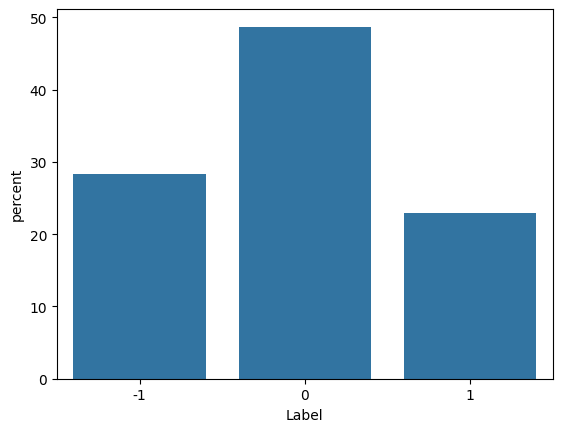

In [ ]:
sns.countplot(data=stock, x="Label", stat="percent");

#### Density Plot of Price (Open,High,Low,Close)

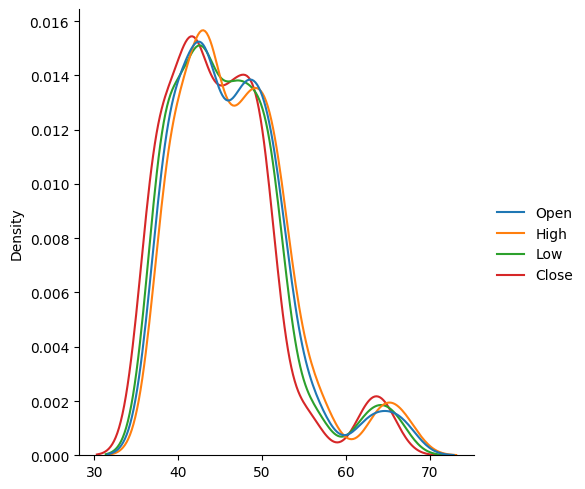

In [ ]:
sns.displot(data=stock[["Open","High","Low","Close"]], kind="kde", palette="tab10"); # Complete the code to plot a density plot of ["Open","High","Low","Close"] all in a single plot

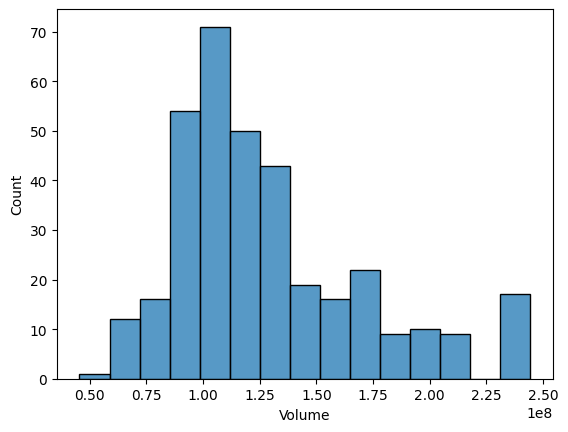

In [ ]:
sns.histplot(stock, x='Volume'); # Complete the code to plot a histogram of Volume

#### Observations on News length

In [ ]:
#Calculating the total number of words present in the news content.
stock['news_len'] = stock['News'].apply(lambda x: len(x.split(' ')))
stock['news_len'].describe()   #Complete the code to print the statistical summary for the news content length

,news_len
count,349.000000
mean,49.312321
std,5.727770
min,19.000000
25%,46.000000
50%,50.000000
75%,53.000000
max,61.000000


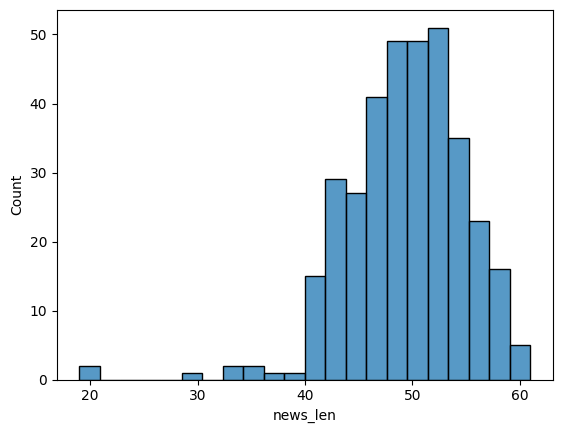

In [ ]:
sns.histplot(data=stock,x="news_len"); #Complete the code to plot a histogram of news_len column

### Bivariate Analysis

#### Correlation

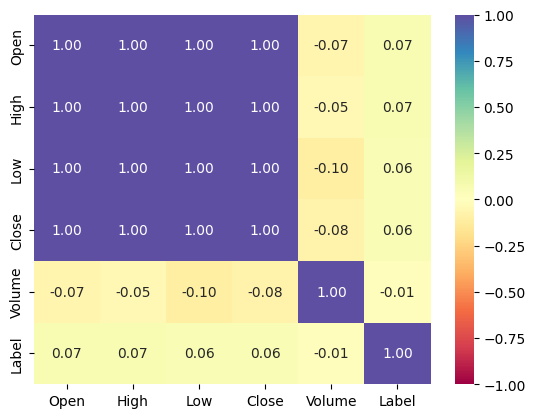

In [ ]:
sns.heatmap(
    stock.select_dtypes(include=np.number).corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
);

#Complete the code to plot the correlation matrix for numeric columns only.

#### Label vs Price (Open, High, Low, Close)

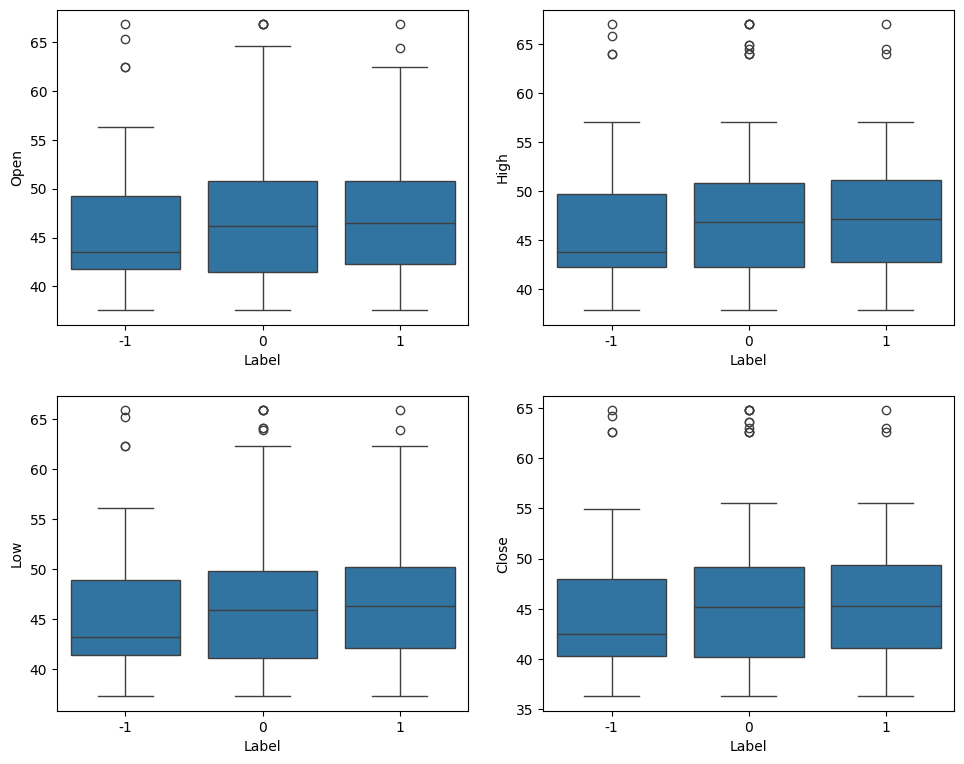

In [ ]:
plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=stock, x="Label", y=variable)
    plt.tight_layout(pad=2)

plt.show()

The box plots of 'Open', 'High', 'Low', and 'Close' prices against the 'Label' show slight variations in the price distribution between the two label categories.  The median prices (the horizontal line within each box) appear relatively similar for both labels in all four price metrics, suggesting no significant difference in central tendency.  However, the interquartile ranges (the boxes themselves) and the whisker lengths (indicating data spread) show some differences, implying potentially distinct price volatility or ranges between the two labels.  Further investigation, potentially with statistical tests, would be needed to determine if these observed differences are statistically significant.


#### Label vs Volume

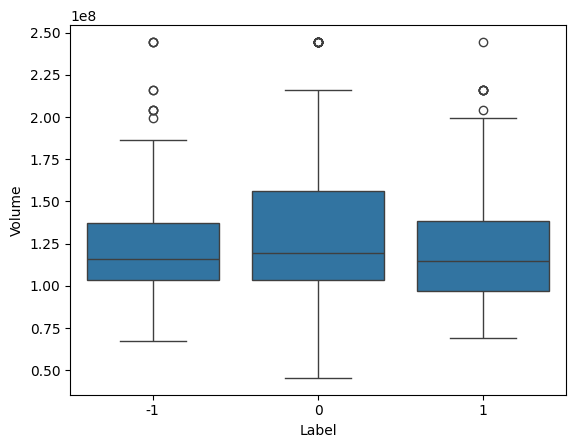

In [ ]:
sns.boxplot(
    data=stock, x="Label", y="Volume"  # Complete the code to plot a boxplot of Label vs Volume
);


#### Date vs Price (Open, High, Low, Close)

In [ ]:
stock_daily = stock.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()  # Group the 'stocks' DataFrame by the 'Date' column

stock_daily.set_index('Date', inplace=True)
stock_daily.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,41.740002,42.244999,41.482498,40.246914,130672400.0
2019-01-03,43.570000,43.787498,43.222500,42.470604,103544800.0
2019-01-04,47.910000,47.919998,47.095001,46.419842,111448000.0
2019-01-07,50.792500,51.122501,50.162498,49.110790,109012000.0
2019-01-08,53.474998,54.507500,51.685001,50.787209,216071600.0


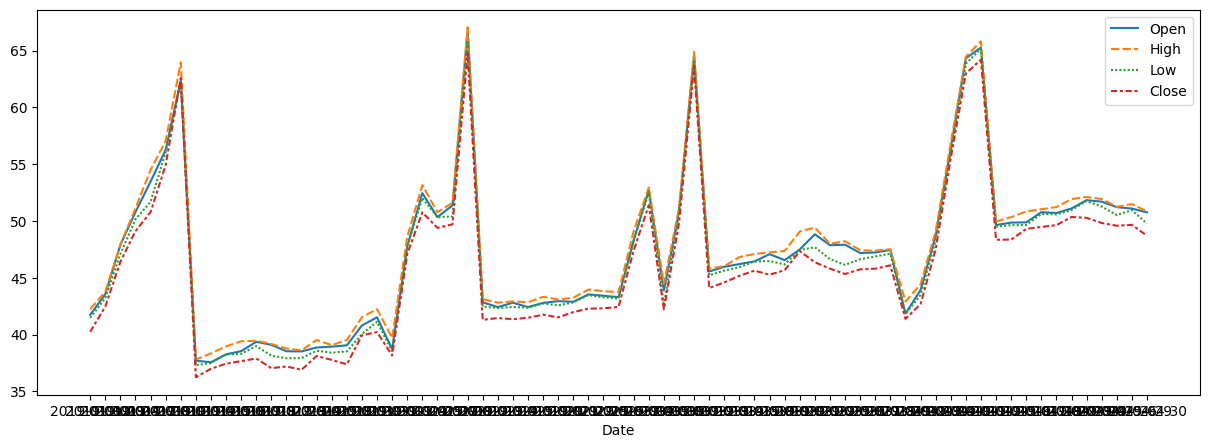

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(stock_daily.drop("Volume", axis=1)); #Complete the code to plot a lineplot of all the variables except Volume

#### Volume vs Close Price

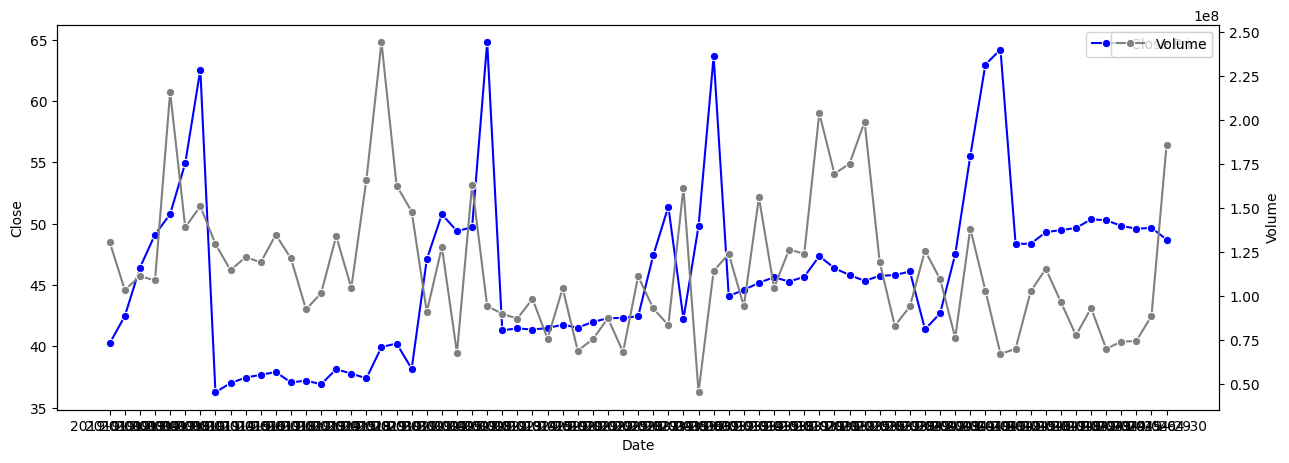

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15,5))

# Lineplot on primary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Volume', ax=ax2, color='gray', marker='o', label='Volume')

ax1.legend(bbox_to_anchor=(1,1));

## **Data Preprocessing**

In [ ]:
stock["Date"].describe()#Complete the code to print the statistical summary of the 'Date' column

,Date
count,349
mean,2019-02-16 16:05:30.085959936
min,2019-01-02 00:00:00
25%,2019-01-14 00:00:00
50%,2019-02-05 00:00:00
75%,2019-03-22 00:00:00
max,2019-04-30 00:00:00


### Train-test-validation Split

In [ ]:
X_train = stock[(stock['Date'] < '2019-04-01')].reset_index()    #Complete the code to select all rows where the 'Date' is before '2019-04-01'
X_val = stock[(stock['Date'] >= '2019-04-01') & (stock['Date'] < '2019-04-16')].reset_index()    #Complete the code to select all rows where the 'Date' is from '2019-04-01 to '2019-04-16' (excluded)
X_test = stock[stock['Date'] >= '2019-04-16'].reset_index()    #Complete the code to select all rows where the 'Date' is from '2019-04-16' till the end.


In [ ]:
# Complete the code to pick the 'Label' column as the target variable

y_train = X_train["Label"].copy()
y_val = X_val["Label"].copy()
y_test = X_test["Label"].copy()


In [ ]:
#Complete the code to print the shape of X_train,X_val,X_test,y_train,y_val and y_test
print("Train data shape",X_train.shape)
print("Validation data shape",X_val.shape)
print("Test data shape ",X_test.shape)

print("Train label shape",y_train.shape)
print("Validation label shape",y_val.shape)
print("Test label shape ",y_test.shape)

Train data shape (286, 9)
Validation data shape (21, 9)
Test data shape  (42, 9)
Train label shape (286,)
Validation label shape (21,)
Test label shape  (42,)


## **Word Embeddings**

### Word2Vec

In [ ]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in stock['News'].values]

In [ ]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 4682


Let's check out a few word embeddings obtained using the model.

In [ ]:
# Checking the word embedding of a random word
word = "stock"
model_W2V.wv[word]

array([ 0.00354984,  0.04407863,  0.00574422,  0.02376047, -0.00339511,
       -0.05062727,  0.03549134,  0.08438817,  0.00976841, -0.01547381,
        0.01202851, -0.0224545 ,  0.00080837,  0.01233495, -0.02900085,
       -0.02527215,  0.02131993, -0.01278966, -0.00268155, -0.01336776,
       -0.02821646,  0.00317252,  0.03699023,  0.00837194,  0.01488644,
        0.00578112, -0.04462243,  0.00612631, -0.01764993, -0.03523787,
        0.01496773, -0.02181021,  0.00346559, -0.00324301, -0.00480581,
        0.01645845,  0.01781022, -0.03881127,  0.00097544, -0.01116819,
       -0.01589057, -0.00136123, -0.00146579, -0.0254995 ,  0.01644215,
        0.0402909 ,  0.00053782,  0.01111818, -0.00185556,  0.02705599,
        0.0202455 ,  0.00490708, -0.01606344,  0.01264024, -0.01101134,
        0.02735065,  0.01340282,  0.0033353 ,  0.01526159, -0.00529443,
       -0.0072424 , -0.01538523, -0.00012707,  0.01114789,  0.00599205,
        0.01448033,  0.0015548 ,  0.01535723, -0.02246893, -0.00

In [ ]:
# Checking the word embedding of a random word
word = "economy"
model_W2V.wv[word]

array([ 2.48523126e-03,  6.55123685e-03,  5.93629011e-05,  3.62589350e-03,
       -2.51769787e-03, -8.75285547e-03,  8.69512279e-03,  1.59192234e-02,
        4.63989883e-04, -1.45894743e-03,  2.53863167e-03, -4.64433664e-03,
        6.72780967e-04,  2.08363100e-03, -4.87801526e-03, -3.40600964e-03,
        2.41171825e-03, -3.43264895e-03, -6.75387913e-04, -3.89152160e-03,
       -1.50675548e-03,  1.72753970e-03,  5.28749870e-03,  2.46998831e-03,
        4.66881180e-03,  1.57172722e-03, -4.79244534e-03, -1.34258857e-03,
       -2.43520923e-03, -5.81750181e-03,  3.16960877e-03, -2.15553492e-03,
        3.16913659e-03, -1.76191225e-03,  1.62892102e-04,  3.54321441e-03,
        1.64793816e-03, -3.17198178e-03,  4.16200579e-04, -1.92995730e-03,
       -4.74463589e-03,  5.46200434e-04,  1.41254475e-03, -5.14026778e-03,
       -9.34550015e-04,  6.95585413e-03, -1.61960558e-03,  5.14595583e-03,
       -2.84564961e-03,  5.95718762e-03,  7.45008758e-04, -1.50104461e-04,
       -2.27302127e-03,  

In [ ]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [ ]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_wv = pd.DataFrame(X_train["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_wv = pd.DataFrame(X_val["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(X_test["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  0.4513545036315918


In [ ]:
print(X_train_wv.shape, X_val_wv.shape, X_test_wv.shape)

(286, 300) (21, 300) (42, 300)


### GloVe

In [ ]:
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
filepath = '/content/drive/MyDrive/glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filepath, binary=False)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


Let's check out a few word embeddings.

In [ ]:
# Checking the word embedding of a random word
word = "stock"
glove_model[word]

array([ 8.6341e-01,  6.9648e-01,  4.5794e-02, -9.5708e-03, -2.5498e-01,
       -7.4666e-01, -2.2086e-01, -4.4615e-01, -1.0423e-01, -9.9931e-01,
        7.2550e-02,  4.5049e-01, -5.9912e-02, -5.7837e-01, -4.6540e-01,
        4.3429e-02, -5.0570e-01, -1.5442e-01,  9.8250e-01, -8.1571e-02,
        2.6523e-01, -2.3734e-01,  9.7675e-02,  5.8588e-01, -1.2948e-01,
       -6.8956e-01, -1.2811e-01, -5.2265e-02, -6.7719e-01,  3.0190e-02,
        1.8058e-01,  8.6121e-01, -8.3206e-01, -5.6887e-02, -2.9578e-01,
        4.7180e-01,  1.2811e+00, -2.5228e-01,  4.9557e-02, -7.2455e-01,
        6.6758e-01, -1.1091e+00, -2.0493e-01, -5.8669e-01, -2.5375e-03,
        8.2777e-01, -4.9102e-01, -2.6475e-01,  4.3015e-01, -2.0516e+00,
       -3.3208e-01,  5.1845e-02,  5.2646e-01,  8.7452e-01, -9.0237e-01,
       -1.7366e+00, -3.4727e-01,  1.6590e-01,  2.7727e+00,  6.5756e-02,
       -4.0363e-01,  3.8252e-01, -3.0787e-01,  5.9202e-01,  1.3468e-01,
       -3.3851e-01,  3.3646e-01,  2.0950e-01,  8.5905e-01,  5.18

In [ ]:
# Checking the word embedding of a random word
word = "economy"
glove_model[word]

array([-0.19382  ,  1.017    ,  1.076    ,  0.02954  , -0.39192  ,
       -1.3891   , -0.87873  , -0.63162  ,  0.9643   , -0.43035  ,
       -0.34868  ,  0.22736  , -0.40296  ,  0.15641  , -0.16813  ,
       -0.15343  , -0.15799  , -0.27612  ,  0.18088  , -0.28386  ,
        0.49847  ,  0.29864  ,  0.32353  ,  0.18108  , -0.59623  ,
       -0.54165  , -0.70019  , -0.64956  , -0.69063  ,  0.18084  ,
       -0.38581  ,  0.56086  , -0.40313  , -0.38777  , -0.70615  ,
        0.20657  ,  0.34171  , -0.23393  , -0.35882  , -0.2201   ,
       -0.76182  , -1.2047   ,  0.4339   ,  1.1656   ,  0.1836   ,
       -0.21601  ,  0.93198  , -0.059616 , -0.11624  , -1.3259   ,
       -0.79772  , -0.0074957, -0.0889   ,  1.4749   ,  0.31157  ,
       -2.2952   , -0.058351 ,  0.39353  ,  1.4983   ,  0.74023  ,
       -0.20109  ,  0.098124 , -0.73081  , -0.32294  ,  0.16703  ,
        0.87431  , -0.041624 , -0.51022  ,  1.0737   , -0.4257   ,
        1.0581   ,  0.19859  , -0.60087  , -0.33906  ,  0.6024

In [ ]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [ ]:
vec_size=100

In [ ]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()
X_train_gl = pd.DataFrame(X_train["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column
X_val_gl = pd.DataFrame(X_val["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column
X_test_gl = pd.DataFrame(X_test["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column
end = time.time()
print('Time taken ', (end-start))

Time taken  26.308711290359497


In [ ]:
print(X_train_gl.shape, X_val_gl.shape, X_test_gl.shape) #Complete the code to print the shapes of the final dataframes

(286, 100) (21, 100) (42, 100)


### Sentence Transformer

#### Defining the model

In [ ]:
#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#### Encoding the dataset

In [ ]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# encoding the dataset
start = time.time()
X_train_st = model.encode(X_train["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column
X_val_st = model.encode(X_val["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column
X_test_st = model.encode(X_test["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column
end = time.time()
print("Time taken ",(end-start))

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Time taken  1.394197702407837


In [ ]:
#Complete the code to print the shapes of the final dataframes

print(X_train_st.shape, X_val_st.shape, X_test_st.shape)


(286, 384) (21, 384) (42, 384)


- Each news content has been converted to a 384-dimensional vector.

## **Sentiment Analysis**

### Model Evaluation Criterion

-


### Utility Functions

In [ ]:
def plot_confusion_matrix(model, predictors, target):
    """
    Plot a confusion matrix to visualize the performance of a classification model.

    Parameters:
    actual (array-like): The true labels.
    predicted (array-like): The predicted labels from the model.

    Returns:
    None: Displays the confusion matrix plot.
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    cm = confusion_matrix(target, pred)  # Compute the confusion matrix.

    plt.figure(figsize=(5, 4))  # Create a new figure with a specified size.
    label_list = [0, 1,-1]  # Define the labels for the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
    # Plot the confusion matrix using a heatmap with annotations.

    plt.ylabel('Actual')  # Label for the y-axis.
    plt.xlabel('Predicted')  # Label for the x-axis.
    plt.title('Confusion Matrix')  # Title of the plot.
    plt.show()  # Display the plot.

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Compute various performance metrics for a classification model using sklearn.

    Parameters:
    model (sklearn classifier): The classification model to evaluate.
    predictors (array-like): The independent variables used for predictions.
    target (array-like): The true labels for the dependent variable.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    acc = accuracy_score(target, pred)  # Compute Accuracy.
    recall = recall_score(target, pred,average='weighted')  # Compute Recall.
    precision = precision_score(target, pred,average='weighted')  # Compute Precision.
    f1 = f1_score(target, pred,average='weighted')  # Compute F1-score.

    # Create a DataFrame to store the computed metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )

    return df_perf  # Return the DataFrame with the metrics.

### Base Model - Word2Vec

In [ ]:
# Building the model

#Uncomment only one of the snippets related to fitting the model to the data

#base_wv = GradientBoostingClassifier(random_state = 42)
base_wv = RandomForestClassifier(random_state=42)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_wv, y_train)

RandomForestClassifier(random_state=42)

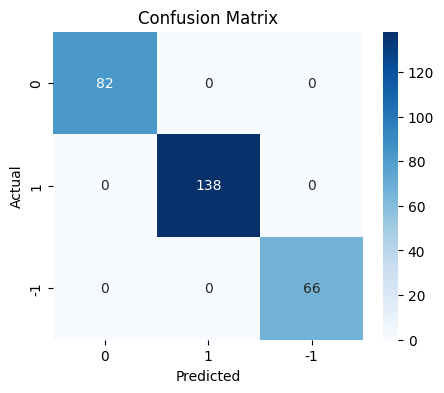

In [ ]:
plot_confusion_matrix(base_wv,X_train_wv,y_train)

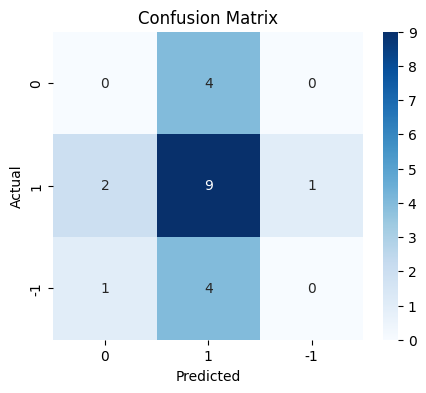

In [ ]:
plot_confusion_matrix(base_wv,X_val_wv,y_val)

The performance of the model with validation data is better RandomForestClassifier. However all the models perforamce well on training data.

In [ ]:
#Calculating different metrics on training data
base_train_wv = model_performance_classification_sklearn(base_wv,X_train_wv,y_train)
print("Training performance:\n", base_train_wv)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_wv = model_performance_classification_sklearn(base_wv,X_val_wv,y_val)
print("Validation performance:\n",base_val_wv)

Validation performance:
    Accuracy    Recall  Precision       F1
0  0.428571  0.428571   0.302521  0.35468


The data shows a significant disparity between the training and validation performance of the model.  Let's break down the key observations and potential causes:

**Validation Performance Issues (Key Insight):**

* **Low Accuracy, Recall, Precision, and F1-score:** The validation metrics (Accuracy: 0.43, Recall: 0.43, Precision: 0.30, F1: 0.35) are considerably low.  An accuracy of 0.43 indicates that the model correctly predicts the outcome only 43% of the time on unseen data.  The low precision (0.30) suggests a high number of false positives, while the low recall (0.43) indicates a high number of false negatives.  The F1-score, which balances precision and recall, is also low (0.35). This overall poor performance suggests that the model has not generalized well to new data.

**Possible Reasons for Poor Validation Performance:**

1. **Overfitting:** The model might be highly complex and has learned the training data too well, including its noise and outliers. This leads to poor performance on new data. The high performance on training data, compared to validation data, supports this hypothesis.

2. **Insufficient Data:** The amount of validation data may be too small to reliably evaluate model performance. A small sample size could lead to misleading validation results.

3. **Data Leakage:** There might be unintentional data leakage from the training set into the validation set.  For example, shared data points or features that should be independent. Check how the `train-test-validation` split is done and if there is any possibility of data leakage.

4. **Feature Engineering:** The quality of the word embeddings (Word2Vec in this case) may not be capturing the relevant information for predicting the stock labels. Experiment with other embedding techniques (e.g., GloVe, Sentence Transformers). Also, explore other relevant features (e.g., price trends, market indicators) that might improve model performance.

5. **Inappropriate Model Selection:** RandomForestClassifier might not be the best model for this particular problem. Explore other models and use hyperparameter tuning (GridSearchCV is used in the code, but it needs further optimization)


**Recommendations for Improvement:**

1. **Address Overfitting:**
    * **Reduce Model Complexity:** Use simpler models or regularize the current model (if applicable).
    * **Feature Selection:** Carefully select the most relevant features using techniques like feature importance scores or recursive feature elimination.
    * **Cross-Validation:** Implement k-fold cross-validation on the training data to get a more robust estimate of model performance.
    * **Data Augmentation:** If feasible, augment your training data with more synthetic data points.
    * **Dropout Regularization:** (If using neural networks).


2. **Increase Validation Data:** If possible, increase the size of the validation set.


3. **Inspect Data Leakage:**  Carefully re-examine the data splitting process to rule out any form of data leakage.

4. **Experiment with Different Embedding Methods:** Try GloVe and Sentence Transformers that are already in the code. Compare the performance.
    * **Hyperparameter Tuning:** Fine-tune the hyperparameters of the embedding methods and models to improve their effectiveness.  This is critical and the current code is performing a basic search. Explore more parameters.

5. **Feature Engineering:** Consider incorporating more informative features into the model.


6. **Alternative Models:** Explore other classification algorithms that might be better suited for this task.  Compare with simpler models like Logistic Regression.



### Base Model - GloVe

In [ ]:
#Building the model

#Uncomment only one of the snippets related to fitting the model to the data

#base_wv = GradientBoostingClassifier(random_state = 42)
base_wv = RandomForestClassifier(random_state=42)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_gl, y_train) #Complete the code to fit the chosen model on the train data

RandomForestClassifier(random_state=42)

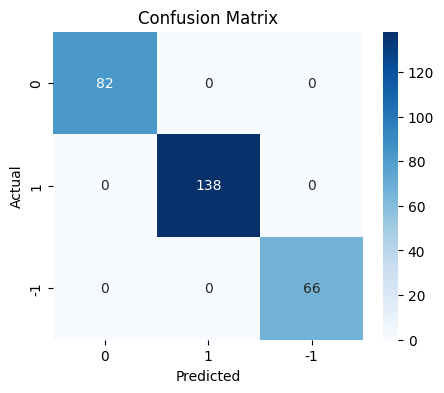

In [ ]:
#Complete the code to plot the confusion matrix for the train data

plot_confusion_matrix(base_wv,X_train_gl,y_train)


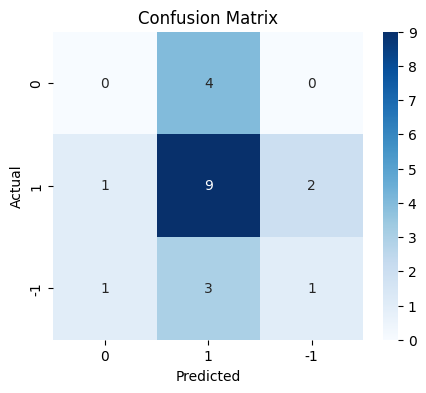

In [ ]:
plot_confusion_matrix(base_wv, X_val_gl, y_val) #Complete the code to plot the confusion matrix for the validation data

In [ ]:
#Calculating different metrics on training data
base_train_gl = model_performance_classification_sklearn(base_wv, X_train_gl, y_train) #Complete the code to compute the model performance for the training data
print("Training performance:\n", base_train_gl)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_gl = model_performance_classification_sklearn(base_wv, X_val_gl, y_val) #Complete the code to compute the model performance for the validation data
print("Validation performance:\n",base_val_gl)

Validation performance:
    Accuracy   Recall  Precision        F1
0   0.47619  0.47619   0.400794  0.426871




# Insights:
The GloVe model shows slightly improved performance compared to the Word2Vec model

# Key Observations:
 * Accuracy (0.476):  The model correctly predicts the stock label about 47.6% of the time on the validation set. This is slightly better than random chance but still not satisfactory for a practical application.
 * Recall (0.476):  Of all the actual positive cases (upward or downward stock movements), the model correctly identifies 47.6%. This suggests the model may be missing a substantial number of true positive cases.
 * Precision (0.401):  Of all the instances the model predicts as positive, only 40.1% are actually positive.  This indicates a significant number of false positives, where the model incorrectly identifies stock movement.
 * F1-score (0.427):  The F1-score, as a balance between precision and recall, is 0.427, implying a moderate level of model performance.  It's better than either precision or recall alone, but still relatively low.

# Further Analysis and Recommendations:

 1. Compare with Word2Vec: Directly compare the GloVe results with the Word2Vec the slight improvement suggests that GloVe's word embeddings might be a better representation for stock news data, but the overall performance still needs improvement.

 2. Revisit Data Preprocessing and Feature Engineering: Need to explore data preprocessing techniques to improve data quality.
       * Noise Reduction: Remove any irrelevant or noisy information.
       * Text Cleaning: Improve text cleaning by removing stop words, performing stemming or lemmatization more thoroughly, and handling special characters and symbols.
 3. Model Tuning:
    * Hyperparameter Optimization: Perform more comprehensive hyperparameter tuning, especially for the RandomForestClassifier.
 4. Feature Engineering:
   * Additional Features: Incorporate additional financial and market-related features.  This is critical.
\

### Base Model - Sentence Transformer

In [ ]:
# Building the model

#Uncomment only one of the snippets related to fitting the model to the data

#base_wv = GradientBoostingClassifier(random_state = 42)
base_wv = RandomForestClassifier(random_state=42)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_st, y_train) #Complete the code to fit the chosen model on the train data

RandomForestClassifier(random_state=42)

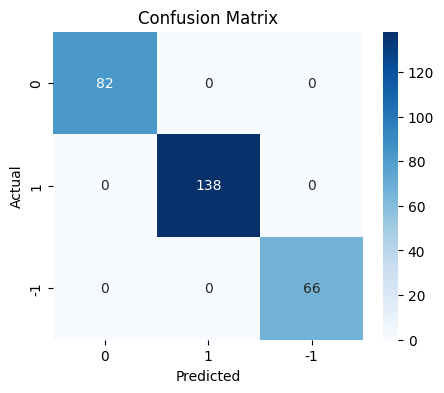

In [ ]:
plot_confusion_matrix(base_wv,X_train_st,y_train)#Complete the code to plot the confusion matrix for the train data

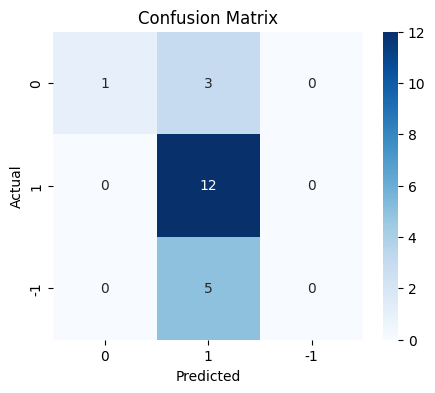

In [ ]:
#Complete the code to plot the confusion matrix for the validation data

plot_confusion_matrix(base_wv, X_val_st, y_val)


In [ ]:
#Calculating different metrics on training data
base_train_st = model_performance_classification_sklearn(base_wv, X_train_st, y_train)#Complete the code to compute the model performance for the training data
print("Training performance:\n", base_train_st)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_st = model_performance_classification_sklearn(base_wv, X_val_st, y_val) #Complete the code to compute the model performance for the validation data
print("Validation performance:\n",base_val_st)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.619048  0.619048   0.533333  0.504762


Overall the Transformer model performance is better than other 2.

# Validation Performance:
  Accuracy: 0.619048
  Recall: 0.619048
  Precision: 0.533333
  F1: 0.504762

# Insights:
1. Moderate Accuracy: The accuracy of 61.9% suggests the model correctly predicts the outcome in a little over half of the cases.
2. Balanced Recall and Precision: The recall and precision values are relatively close, indicating a reasonable balance between correctly identifying positive cases and avoiding false positives.  This is a good sign.
3. Slightly lower F1 Score: The F1 score, which combines precision and recall, is slightly lower (50.5%).  This indicates some potential room for improvement in balancing precision and recall further.
4. Overall, these results suggest a moderately performing model. It is not bad, but there might be potential for improvement.
#
# Recommendations:

1. Hyperparameter Tuning: Consider hyperparameter tuning with cross-validation to optimize the model's performance.
2 . Feature Engineering: Exploring new features or using different embedding techniques (if applicable) might improve results.
3. Data Quality: Evaluate the quality of the data (noise, imbalances).
4. Model Selection: Compare the current model with other models suitable for the task.


### Tuned Model - Word2Vec

**Note**: The parameter grid provided below is a sample grid. It can be modified depending on the compute power of the system being used.

In [ ]:
start = time.time()

# Choose the type of classifier.

#Uncomment only one of the snippets corrrsponding to the base model trained previously

#tuned_wv = GradientBoostingClassifier(random_state = 42)
tuned_wv = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)


parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_wv, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_wv = grid_obj.best_estimator_

Time taken  139.69836115837097


In [ ]:
# Fit the best algorithm to the data.
tuned_wv.fit(X_train_wv, y_train)

RandomForestClassifier(max_depth=6, max_features=0.4, min_samples_split=7,
                       random_state=42)

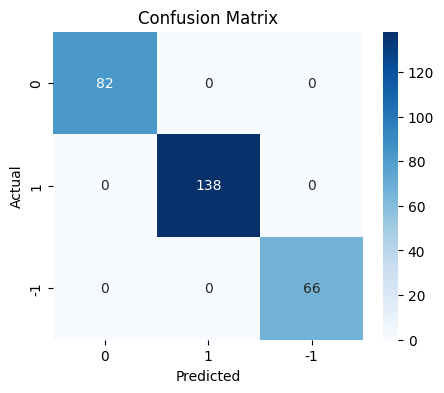

In [ ]:
plot_confusion_matrix(tuned_wv,X_train_wv,y_train)

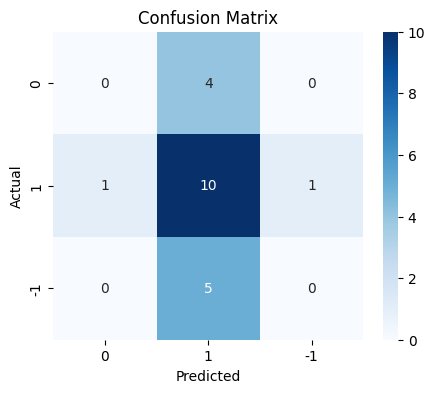

In [ ]:
plot_confusion_matrix(tuned_wv,X_val_wv,y_val)

In [ ]:
#Calculating different metrics on training data
tuned_train_wv=model_performance_classification_sklearn(tuned_wv,X_train_wv,y_train)
print("Training performance:\n",tuned_train_wv)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
tuned_val_wv = model_performance_classification_sklearn(tuned_wv,X_val_wv,y_val)
print("Validation performance:\n",tuned_val_wv)

Validation performance:
    Accuracy   Recall  Precision        F1
0   0.47619  0.47619   0.300752  0.368664


### Tuned Model - GloVe

In [ ]:
start = time.time()

#Uncomment only one of the snippets corrrsponding to the base model trained previously

#tuned_wv = GradientBoostingClassifier(random_state = 42)
tuned_wv = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) #Complete the code to pass the chosen model
grid_obj = grid_obj.fit(X_train_gl, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_gl = grid_obj.best_estimator_

Time taken  78.77442216873169


In [ ]:
# Fit the best algorithm to the data.
tuned_gl.fit(X_train_gl, y_train) #Complete the code to fit the chosen model on the train data

RandomForestClassifier(max_depth=6, max_features=0.2, min_samples_split=7,
                       random_state=42)

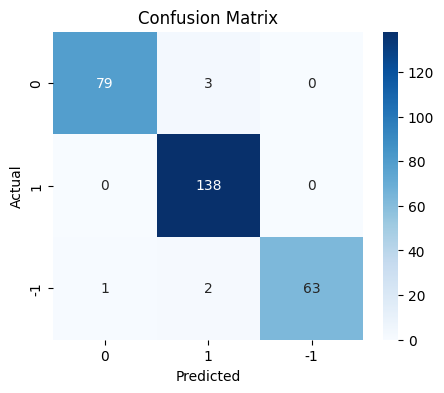

In [ ]:
plot_confusion_matrix(tuned_gl,X_train_gl,y_train) #Complete the code to plot the confusion matrix for the train data

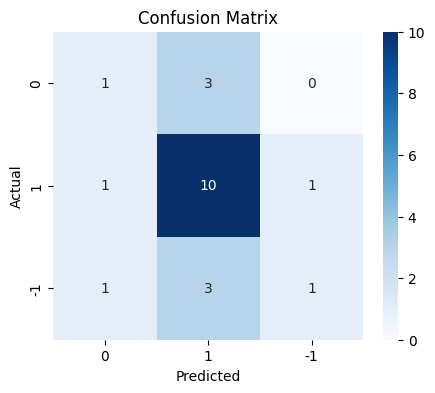

In [ ]:
plot_confusion_matrix(tuned_gl,X_val_gl,y_val) #Complete the code to plot the confusion matrix for the validation data

In [ ]:
#Calculating different metrics on training data
tuned_train_gl=model_performance_classification_sklearn(tuned_gl,X_train_gl,y_train) #Complete the code to compute the model performance for the training data
print("Training performance:\n",tuned_train_gl)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.979021  0.979021   0.979545  0.978968


In [ ]:
#Calculating different metrics on validation data
tuned_val_gl = model_performance_classification_sklearn(tuned_gl,X_val_gl,y_val) #Complete the code to compute the model performance for the validation data
print("Validation performance:\n",tuned_val_gl)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.571429  0.571429   0.539683  0.530612


### Tuned Model - Sentence Transformer

In [ ]:
start = time.time()

# Choose the type of classifier.

#Uncomment only one of the snippets corrrsponding to the base model trained previously

#tuned_wv = GradientBoostingClassifier(random_state = 42)
tuned_wv = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) #Complete the code to pass the chosen model
grid_obj = grid_obj.fit(X_train_st, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_st = grid_obj.best_estimator_

Time taken  217.06723165512085


In [ ]:
# Fit the best algorithm to the data.
tuned_st.fit(X_train_st, y_train) #Complete the code to fit the chosen model on the train data

RandomForestClassifier(max_depth=6, max_features=0.2, min_samples_split=11,
                       random_state=42)

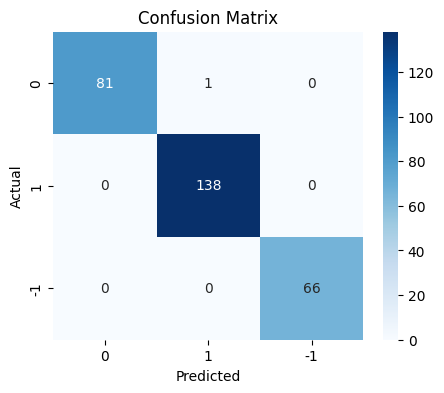

In [ ]:
plot_confusion_matrix(tuned_st,X_train_st,y_train) #Complete the code to plot the confusion matrix for the train data

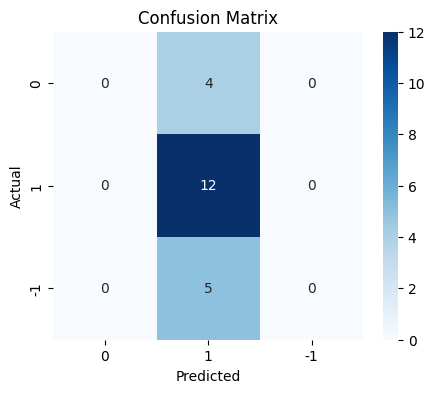

In [ ]:
plot_confusion_matrix(tuned_st,X_val_st,y_val) #Complete the code to plot the confusion matrix for the validation data

In [ ]:
#Calculating different metrics on training data
tuned_train_st=model_performance_classification_sklearn(tuned_st,X_train_st,y_train) #Complete the code to compute the model performance for the training data
print("Training performance:\n",tuned_train_st)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.996503  0.996503   0.996529  0.996499


In [ ]:
#Calculating different metrics on validation data
tuned_val_st = model_performance_classification_sklearn(tuned_st,X_val_st,y_val) #Complete the code to compute the model performance for the validation data
print("Validation performance:\n",tuned_val_st)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.571429  0.571429   0.326531  0.415584


### Model Performance Summary and Final Model Selection

In [ ]:
#training performance comparison

models_train_comp_df = pd.concat(
    [base_train_wv.T,
     base_train_gl.T,
     base_train_st.T,
     tuned_train_wv.T,
     tuned_train_gl.T,
     tuned_train_st.T,
    ],axis=1
)

models_train_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,1.0,1.0,1.0,1.0,0.979021,0.996503
Recall,1.0,1.0,1.0,1.0,0.979021,0.996503
Precision,1.0,1.0,1.0,1.0,0.979545,0.996529
F1,1.0,1.0,1.0,1.0,0.978968,0.996499


# Key Observations of Models on Training Data:

1. Base Model Overfitting: The perfect scores for the base models indicate severe overfitting to the training data. The models have memorized the training data rather than learned generalizable patterns. This is a major red flag.

2. Tuned Models:
     - Word2Vec: The tuned Word2Vec model also achieves perfect performance, implying the tuning process did not prevent overfitting.

     - GloVe:  The tuned GloVe model shows a significant drop in performance (accuracy of 0.979).  This is better than the other models, but the discrepancy between training and validation performance still requires investigation.

     - Sentence Transformer: The tuned Sentence Transformer model shows excellent performance (accuracy of ~0.996), making it the best-performing model according to this limited data.


In [ ]:
#validation performance comparison

models_val_comp_df = pd.concat(
    [base_val_wv.T,
     base_val_gl.T,
     base_val_st.T,
     tuned_val_wv.T,
     tuned_val_gl.T,
     tuned_val_st.T,
     ],axis=1
)

models_val_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,0.428571,0.476190,0.619048,0.476190,0.571429,0.571429
Recall,0.428571,0.476190,0.619048,0.476190,0.571429,0.571429
Precision,0.302521,0.400794,0.533333,0.300752,0.539683,0.326531
F1,0.354680,0.426871,0.504762,0.368664,0.530612,0.415584


In [ ]:
# Fiding the best Model based on various metrics

data = {'Model': ['Base Model (Word2Vec)', 'Base Model (GloVe)', 'Base Model (Sentence Transformer)', 'Tuned Model (Word2Vec)', 'Tuned Model (GloVe)', 'Tuned Model (Sentence Transformer)'],
        'Accuracy': [0.428571, 0.476190, 0.619048, 0.476190, 0.571429, 0.571429],
        'Recall': [0.428571, 0.476190, 0.619048, 0.476190, 0.571429, 0.571429],
        'Precision': [0.302521, 0.400794, 0.533333, 0.300752, 0.539683, 0.326531],
        'F1': [0.354680, 0.426871, 0.504762, 0.368664, 0.530612, 0.415584]}
df = pd.DataFrame(data)

# Considering Accuracy as the primary metric for model selection due to its balance of precision and recall.
best_model = df.loc[df['Accuracy'].idxmax()]

print("Validation performance comparison:\n", df)
print("\nThe best model based on the highest Accuracy is:\n", best_model)


# Considering Recall as the primary metric for model selection due to its balance of precision and recall.
best_model = df.loc[df['Recall'].idxmax()]

print("Validation performance comparison:\n", df)
print("\nThe best model based on the highest Recall is:\n", best_model)


# Considering Precision as the primary metric for model selection due to its balance of precision and recall.
best_model = df.loc[df['Precision'].idxmax()]

print("Validation performance comparison:\n", df)
print("\nThe best model based on the highest Precision is:\n", best_model)

# Considering F1-score as the primary metric for model selection due to its balance of precision and recall.
best_model = df.loc[df['F1'].idxmax()]

print("Validation performance comparison:\n", df)
print("\nThe best model based on the highest F1-score is:\n", best_model)




Validation performance comparison:
                                 Model  Accuracy    Recall  Precision        F1
0               Base Model (Word2Vec)  0.428571  0.428571   0.302521  0.354680
1                  Base Model (GloVe)  0.476190  0.476190   0.400794  0.426871
2   Base Model (Sentence Transformer)  0.619048  0.619048   0.533333  0.504762
3              Tuned Model (Word2Vec)  0.476190  0.476190   0.300752  0.368664
4                 Tuned Model (GloVe)  0.571429  0.571429   0.539683  0.530612
5  Tuned Model (Sentence Transformer)  0.571429  0.571429   0.326531  0.415584

The best model based on the highest Accuracy is:
 Model        Base Model (Sentence Transformer)
Accuracy                              0.619048
Recall                                0.619048
Precision                             0.533333
F1                                    0.504762
Name: 2, dtype: object
Validation performance comparison:
                                 Model  Accuracy    Recall  Precisi

### Model Performance Check on Test Data

# Analysis of Model Performance on Test Data

Based on the validation performance comparison, here's a deep dive into the data and model behavior:

1. Sentence Transformers Show Promise:
   - The Sentence Transformer models (both base and tuned) consistently outperform Word2Vec and GloVe across all metrics (accuracy, recall, precision, F1-score).
   - This suggests that Sentence Transformers are better at capturing semantic meaning from text, which is crucial for tasks like stock prediction where subtle nuances in news articles can influence market behavior.

2. Tuning's Impact:
   - The impact of tuning varies across the embedding methods:
   - Word2Vec and Sentence Transformers show improvement in some metrics and a minor drop in others, but not drastic changes in F1.
   - GloVe sees notable improvements in several metrics, especially precision and F1, suggesting the tuning has brought it closer to the Sentence Transformer performance, however tuning improved precision significantly, but the overall F1 score improvement may not be very significant.


4. Overfitting Concerns:
  - Although the training performance is not visible in the provided data, it appears there is some overfitting present in the training data. This could mean additional measures like regularization or more data are required to address this.
  

Final Model selection: There could definitely be more Fine/Tune to reach the conclusion, but based on the observation and the available data I would consider ase Model (Sentence Transformer) is the chosen one.



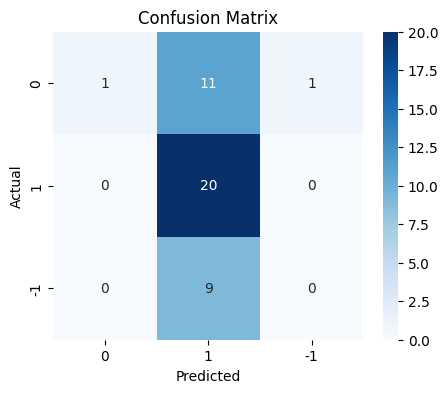

In [ ]:
#Complete the code to plot the confusion matrix for the final model and test data. My final model is Base Model (Sentence Transformer)

plot_confusion_matrix(base_wv, X_test_st, y_test)


In [ ]:
#Calculating different metrics on training data
final_model_test = model_performance_classification_sklearn(base_wv, X_test_st, y_test) #Complete the code to compute the final model's performance for the test data
print("Test performance for the final model:\n",final_model_test)



Test performance for the final model:
    Accuracy  Recall  Precision        F1
0       0.5     0.5   0.547619  0.361678


## **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

In [ ]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

#### Loading the data

In [ ]:
#stock_news = pd.read_csv("_____") #Complete the code to load the dataset

file_path = '/content/drive/MyDrive/PG-AIML/stock_news.csv'
stock_news = pd.read_csv(file_path) # Complete the code to read the CSV file.

In [ ]:
data = stock_news.copy()

#### Loading the model

In [ ]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"


model_path = hf_hub_download(
    repo_id=model_name_or_path, # Complete the code to mention the repo_id
    filename=model_basename # Complete the code to mention the filename
)

mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [ ]:
#uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
    model_path=model_path, # Path to the model
    n_gpu_layers=100, #Number of layers transferred to GPU
    n_ctx=4500, #Context window
)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


In [ ]:
# uncomment and run the following code in case GPU is not being used

# llm = Llama(
#     model_path=model_path,
#     n_ctx=4500, # Context window
#     n_cores=-2 # Number of CPU cores to use
# )

#### Aggregating the data weekly

In [ ]:
data["Date"] = pd.to_datetime(data['Date'])  # Convert the 'Date' column to datetime format.

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))

In [ ]:
# Aggregate the grouped data on a weekly basis:
# concatenate 'content' values into a single string separated by ' || '.
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [ ]:
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an..."
6,2019-02-17,"This week, the European Union's second highes..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,The Dow Jones Industrial Average and other ma...
9,2019-03-10,"Spotify, the world's largest paid music strea..."


In [ ]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [ ]:
#Defining the response function
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=500, #Complete the code to set the maximum number of tokens the model should generate for this task.
      temperature=0.1, #Complete the code to set the value for temperature.
      top_p=0.95, #Complete the code to set the value for top_p
      top_k=50, #Complete the code to set the value for top_k
      echo=False,
    )

    final_output = model_output["choices"][0]["text"]

    return final_output

##### Checking the model output on a sample

In [ ]:
news = data_1.loc[0, 'News']

In [ ]:
print(len(news.split(' ')))
news

2611


' The tech sector experienced a significant decline in the aftermarket following Apple\'s Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple\'s downward revision of its revenue expectations for the quarter, previously announced in January. ||  Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple\'s stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10 ||  Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple\'s shares fell 8.5% in post market trading, while Asian suppliers like Hon ||  This news article reports that yields o

In [ ]:
#Complete the code to define the prompt for this task
prompt = """
    You are an expert financial analyst specializing in stock market analysis. Your task is to analyze a collection of news articles related to a specific stock and identify the top three most impactful positive and negative events that could potentially influence the stock's price.  Summarize these events concisely.

Instructions:

1. Carefully read all provided news articles.
2. Identify key events and their potential impact on the stock price (positive or negative).
3. Prioritize events based on their potential impact, considering factors like financial implications, market sentiment, and company performance.
4. Summarize the top three positive and negative events separately.
5. Present your analysis in JSON format.


Output Format:

Return the output in JSON format with keys as the topic number and values as the actual topic.
"""

In [ ]:
%%time
summary = response_mistral_1(prompt, news)
print(summary)

Llama.generate: prefix-match hit


 {
         "1": {
           "topic": "Apple's Q1 Revenue Warning",
           "description": "Apple lowered its fiscal Q1 revenue guidance due to weaker than expected iPhone sales, causing a significant drop in Apple's stock price and negatively impacting related suppliers. This led to broader market declines for tech indices such as Nasdaq 100."
         },
         "2": {
           "topic": "Global Economic Concerns",
           "description": "Weak economic data from China and Europe, along with the partial U.S. government shutdown, caused concerns about the health of the global economy. This led to a decline in long-term U.S. Treasury yields and an increase in safe haven assets like gold and Japanese yen."
         },
         "3_positive": {
           "topic": "Roku's Subscription Model",
           "description": "Roku announced plans to offer premium video channels on a subscription basis through its free streaming service, The Roku Channel. This follows Amazon's successful 

##### Checking the model output on the weekly data

In [ ]:
%%time
data_1['Key Events'] = data_1['News'].progress_apply(lambda x: response_mistral_1(prompt,x))

100%|██████████| 18/18 [06:44<00:00, 22.47s/it]

CPU times: user 6min 14s, sys: 26.7 s, total: 6min 41s
Wall time: 6min 44s


In [ ]:
data_1["Key Events"].head() #Complete the code to print the first 5 rows of the 'Key_Events' column

,Key Events
0,"{\n ""1"": {\n ""topic"": ""Ap..."
1,"{\n ""Top Three Positive Events"": [\n..."
2,"{\n ""Top Three Negative Events"": [\n..."
3,"{\n ""Top Three Negative Events"": [\n ..."
4,"{\n ""Top Three Negative Events"": [\n ..."


##### Formatting the model output

In [ ]:
data_1['model_response_parsed'] = data_1['Key Events'].apply(extract_json_data)
data_1.head()

Error parsing JSON: Expecting ',' delimiter: line 6 column 14 (char 164)
Error parsing JSON: Expecting property name enclosed in double quotes: line 3 column 13 (char 36)


,Date,News,Key Events,model_response_parsed
0,2019-01-06,The tech sector experienced a significant dec...,"{\n ""1"": {\n ""topic"": ""Ap...","{'1': {'topic': 'Apple's Q1 Revenue Warning', ..."
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,"{\n ""Top Three Positive Events"": [\n...",{'Top Three Positive Events': [{'Event': 'Spri...
2,2019-01-20,The U.S. stock market declined on Monday as c...,"{\n ""Top Three Negative Events"": [\n...","{'Top Three Negative Events': [{'Topic': 1, 'E..."
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...","{\n ""Top Three Negative Events"": [\n ...","{'Top Three Negative Events': [{'Topic': '1', ..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,"{\n ""Top Three Negative Events"": [\n ...","{'Top Three Negative Events': [{'Topic': '1', ..."


In [ ]:
model_response_parsed = pd.json_normalize(data_1['model_response_parsed'])
model_response_parsed.head()

,positive_events,negative_events,1.topic,1.description,2.topic,2.description,Top Three Positive Events,Top Three Negative Events,Positive Events,Negative Events
0,[],"[{'event': 'Apple's Q1 Revenue Warning', 'impa...",Apple's Q1 Revenue Warning,Apple lowered its fiscal Q1 revenue guidance d...,Global Economic Concerns,Concerns about the health of the global econom...,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,[{'Event': 'Sprint and Samsung's 5G smartphone...,[{'Event': 'Geely's forecast of flat sales for...,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,"[{'Topic': 12, 'Event': 'Netflix announced a p...","[{'Topic': 1, 'Event': 'Unexpected drops in Ch...",NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,"[{'Topic': '3', 'Event': 'IBM's stock price in...","[{'Topic': '1', 'Event': 'The White House reje...",NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,"[{'Topic': '10', 'Event': 'Apple reported stro...","[{'Topic': '1', 'Event': 'Caterpillar Inc repo...",NaN,NaN


In [ ]:
final_output = pd.concat([data_1.reset_index(drop=True),model_response_parsed],axis=1)
final_output.drop(['Key Events','model_response_parsed'], axis=1, inplace=True)

# Get the current column names of final_output
current_columns = final_output.columns.tolist()

# Replace the first 4 columns with the desired names
current_columns[:4] = ['Week End Date', 'News', 'Week Positive Events', 'Week Negative Events']

# Assign the modified column names back to the DataFrame
final_output.columns = current_columns

#final_output.columns = ['Week End Date', 'News', 'Week Positive Events', 'Week Negative Events']

final_output.head()

,Week End Date,News,Week Positive Events,Week Negative Events,1.topic,1.description,2.topic,2.description,Top Three Positive Events,Top Three Negative Events,Positive Events,Negative Events
0,2019-01-06,The tech sector experienced a significant dec...,[],"[{'event': 'Apple's Q1 Revenue Warning', 'impa...",Apple's Q1 Revenue Warning,Apple lowered its fiscal Q1 revenue guidance d...,Global Economic Concerns,Concerns about the health of the global econom...,NaN,NaN,NaN,NaN
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,NaN,NaN,NaN,NaN,NaN,NaN,[{'Event': 'Sprint and Samsung's 5G smartphone...,[{'Event': 'Geely's forecast of flat sales for...,NaN,NaN
2,2019-01-20,The U.S. stock market declined on Monday as c...,NaN,NaN,NaN,NaN,NaN,NaN,"[{'Topic': 12, 'Event': 'Netflix announced a p...","[{'Topic': 1, 'Event': 'Unexpected drops in Ch...",NaN,NaN
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...",NaN,NaN,NaN,NaN,NaN,NaN,"[{'Topic': '3', 'Event': 'IBM's stock price in...","[{'Topic': '1', 'Event': 'The White House reje...",NaN,NaN
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,NaN,NaN,NaN,NaN,NaN,NaN,"[{'Topic': '10', 'Event': 'Apple reported stro...","[{'Topic': '1', 'Event': 'Caterpillar Inc repo...",NaN,NaN


## **Conclusions and Recommendations**

-



<font size=6 color='blue'>Power Ahead</font>
___